In [1]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from pca import pca
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss,classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.compose import make_column_transformer, make_column_selector
from tqdm import tqdm

<h1 style = 'color:orange'>PCA</h1> 

In [2]:
milk = pd.read_csv('../Datasets/milk.csv',index_col=0)
scaler = StandardScaler().set_output(transform='pandas')
milk_scaled = scaler.fit_transform(milk)

prcomp = PCA().set_output(transform='pandas')
pca_data = prcomp.fit_transform(milk_scaled)

w,v = np.linalg.eigh(milk_scaled.cov())
pd.DataFrame(w),pca_data.var(),pca_data,milk_scaled


(          0
 0  0.006570
 1  0.102689
 2  0.134291
 3  0.924372
 4  4.040412,
 pca0    4.040412
 pca1    0.924372
 pca2    0.134291
 pca3    0.102689
 pca4    0.006570
 dtype: float64,
                 pca0      pca1      pca2      pca3      pca4
 Animal                                                      
 HORSE       2.435175 -0.231478  0.330150  0.307664  0.048184
 ORANGUTAN   2.258736 -0.693148  0.029035 -0.081057 -0.000532
 MONKEY      2.335861 -0.663328  0.101257  0.247997  0.010109
 DONKEY      2.318677 -0.273815  0.109881 -0.092873 -0.006769
 HIPPO       2.060294 -1.019199 -0.762436 -0.510091  0.029382
 CAMEL       1.301536  0.137303 -0.198742 -0.282160 -0.014668
 BISON       1.282742  0.622667  0.253785  0.065148 -0.044486
 BUFFALO     0.505068  0.088235  0.008383  0.133774  0.083806
 GUINEA PIG -0.255502  0.287373 -0.881857 -0.013100 -0.016484
 CAT        -0.051008  0.470136 -0.355676  1.050970  0.159793
 FOX         0.429017  0.459312  0.135181  0.236941 -0.024309
 LLAMA  

[03-11-2025 13:40:03] [pca.pca] [INFO] Column labels are auto-completed.
[03-11-2025 13:40:03] [pca.pca] [INFO] PCA reduction performed to capture 95.0% explained variance using 5 columns of the input data.
[03-11-2025 13:40:03] [pca.pca] [INFO] Fit using PCA.
[03-11-2025 13:40:03] [pca.pca] [INFO] Compute loadings and PCs.
[03-11-2025 13:40:03] [pca.pca] [INFO] Compute explained variance.
[03-11-2025 13:40:03] [pca.pca] [INFO] Number of components is 2 that covers 95.00% explained variance.
[03-11-2025 13:40:03] [pca.pca] [INFO] The PCA reduction is performed on the 5 columns of the input dataframe.
[03-11-2025 13:40:03] [pca.pca] [INFO] Fit using PCA.
[03-11-2025 13:40:03] [pca.pca] [INFO] Compute loadings and PCs.
[03-11-2025 13:40:03] [pca.pca] [INFO] Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[03-11-2025 13:40:03] [pca.pca] [INFO] Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[03-11-2025 13:40:03] [pca.pca] [INFO] Outlier de

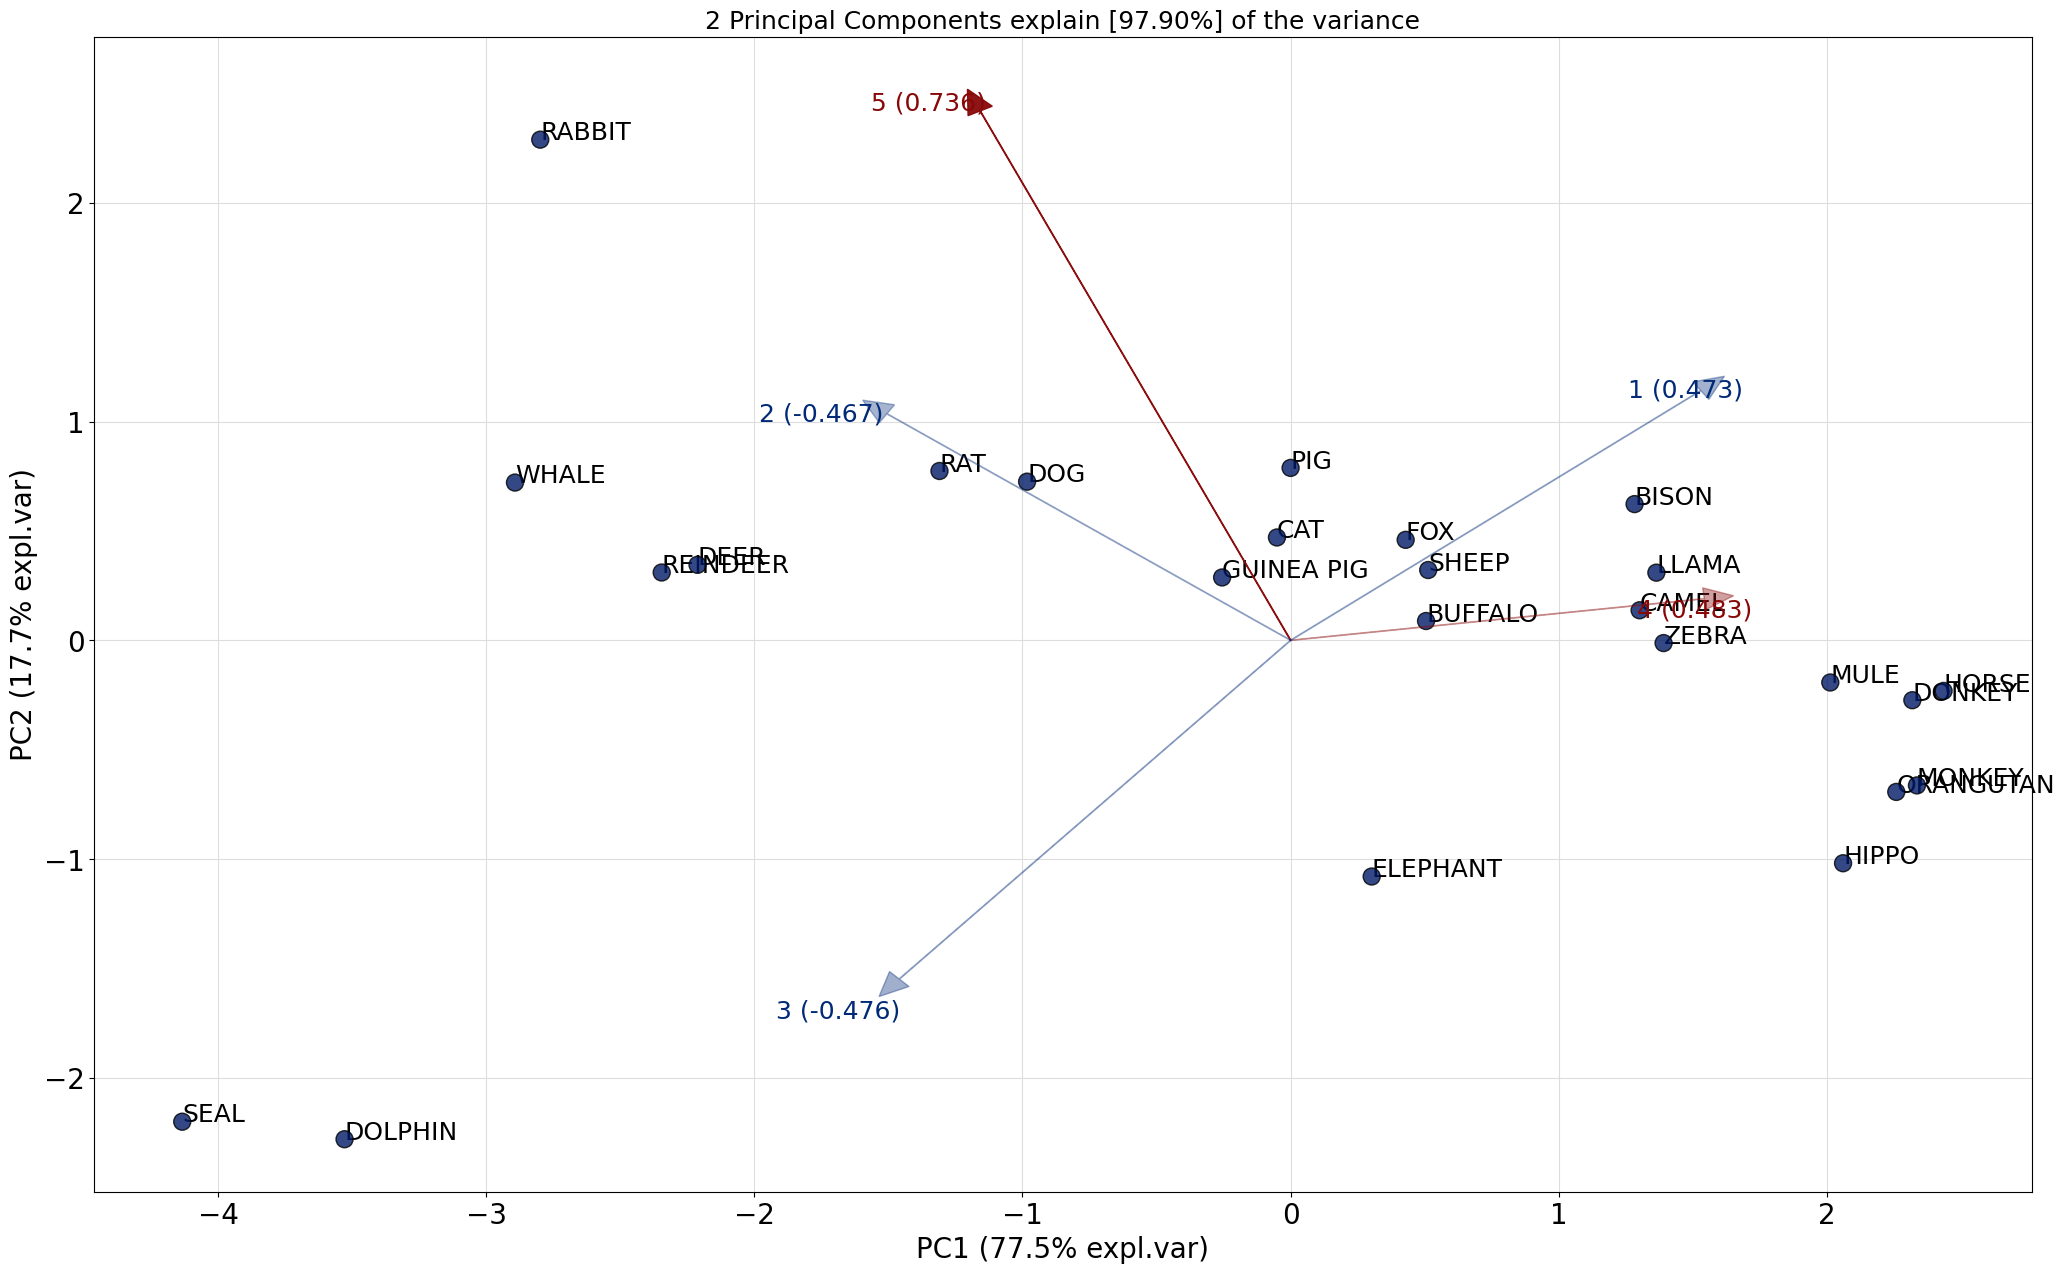

(25, 5)

In [3]:
#applying pca
model = pca()
results = model.fit_transform(milk_scaled,col_labels = milk_scaled.values,row_labels=list(milk.index))
model.biplot(label = True,legend=True)
for i in np.arange(0,milk.shape[0]):
    plt.text(pca_data.values[i,0],
             pca_data.values[i,1],
            list(pca_data.index)[i])
plt.show()
milk.shape

In [4]:
(prcomp.explained_variance_)/sum(prcomp.explained_variance_) #distribution of each component in pca 
variance_ratio = prcomp.explained_variance_ratio_

np.cumsum(variance_ratio)


array([0.77575905, 0.95323854, 0.97902239, 0.9987386 , 1.        ])

<h1 style = color:orange>Breast Cancer</h1>

array([ 68.92148641,  76.17490546,  82.27277194,  86.70847108,
        90.60818755,  94.06577109,  96.59348125,  98.86016534,
       100.        ])

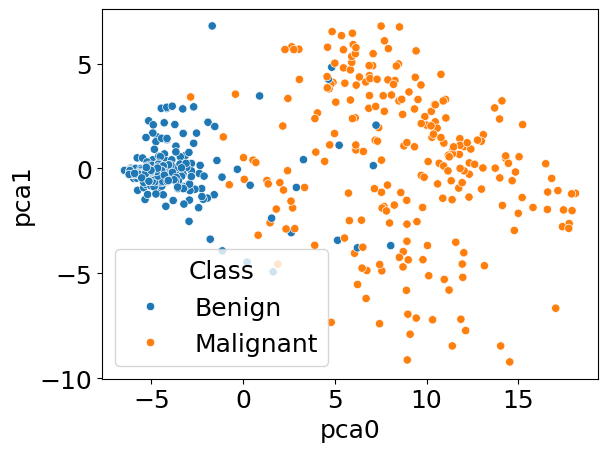

In [5]:
cancer = pd.read_csv('../Cases/Wisconsin/BreastCancer.csv',index_col=0)

X = cancer.drop('Class',axis=1)
y = cancer['Class']

prcomp = PCA().set_output(transform='pandas')
X_prcomp = prcomp.fit_transform(X)
pca_data = X_prcomp.copy()
pca_data['Class']= y
sns.scatterplot(data = pca_data,x = 'pca0',y= 'pca1',hue='Class')
np.cumsum(prcomp.explained_variance_ratio_)*100

<h1 style = color:orange>PCA with supervised learning</h1>

In [6]:
cancer = pd.read_csv('../Cases/Wisconsin/BreastCancer.csv',index_col=0)

X = cancer.drop('Class',axis=1)
y = cancer['Class']

prcomp = PCA().set_output(transform='pandas')

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=25,stratify=y)
X_train_pca = prcomp.fit_transform(X_train)
X_train_pca  = X_train_pca.iloc[:,:3]
X_test_pca = prcomp.transform(X_test)
X_test_pca  = X_test_pca.iloc[:,:3]

svm = SVC(kernel='linear',probability=True)
svm.fit(X_train_pca,y_train)
y_pred = svm.predict(X_test_pca)
y_pred_proba = svm.predict_proba(X_test_pca)
print(classification_report(y_test,y_pred))
log_loss(y_test,y_pred_proba)

              precision    recall  f1-score   support

      Benign       0.98      0.99      0.99       138
   Malignant       0.99      0.96      0.97        72

    accuracy                           0.98       210
   macro avg       0.98      0.98      0.98       210
weighted avg       0.98      0.98      0.98       210



0.07939929173303638

<H1>Sonar dataset</H1>

In [7]:
sonar = pd.read_csv('../Cases/Sonar/Sonar.csv')

y = sonar['Class']
X = sonar.drop('Class',axis = 1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=25,stratify=y)

prcomp = PCA().set_output(transform='pandas')

X_train_pca = prcomp.fit_transform(X_train)
X_test_pca = prcomp.transform(X_test)

X_train_pca = X_train_pca.iloc[:,:13]
X_test_pca = X_test_pca.iloc[:,:13]

svm = SVC(kernel='rbf',probability=True)
svm.fit(X_train_pca,y_train)
y_pred = svm.predict(X_test_pca)
y_pred_proba = svm.predict_proba(X_test_pca)

print(classification_report(y_test,y_pred))
log_loss(y_test,y_pred_proba)

              precision    recall  f1-score   support

           M       0.76      0.94      0.84        34
           R       0.90      0.66      0.76        29

    accuracy                           0.81        63
   macro avg       0.83      0.80      0.80        63
weighted avg       0.83      0.81      0.80        63



0.35730593049450643

<h1>HR Dataset</h1>

In [10]:
hr = pd.read_csv('../Cases/HRAnalytics/HR_comma_sep.csv')

ohe = OneHotEncoder(sparse_output=False,drop='first')
# oe = OrdinalEncoder(categories=[['low','medium','high']])

scaler = StandardScaler().set_output(transform='pandas')

column_transform = make_column_transformer((ohe,make_column_selector(dtype_include=object)),remainder='passthrough',verbose_feature_names_out=False).set_output(transform='pandas')
hr = column_transform.fit_transform(hr)

X = hr.drop('left', axis=1)
y = hr['left']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=25,stratify=y)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

pca = PCA().set_output(transform='pandas')
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

np.cumsum(pca.explained_variance_ratio_)*100

X_train_pca = X_train_pca.iloc[:, :2]
X_test_pca = X_test_pca.iloc[:, :2]

svm = SVC(kernel='linear',probability=True)
svm.fit(X_train_pca,y_train)
y_pred = svm.predict(X_test_pca)

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.76      1.00      0.87      3429
           1       0.00      0.00      0.00      1070

    accuracy                           0.76      4499
   macro avg       0.38      0.50      0.43      4499
weighted avg       0.58      0.76      0.66      4499



C:\Users\dai\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\dai\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\dai\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, 

In [12]:
n_components = np.arange(2, 16)
scores = []
for n in tqdm(n_components):
    pca = PCA(n_components=n).set_output(transform='pandas')
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    X_train_pca = X_train_pca.iloc[:, :n]
    X_test_pca = X_test_pca.iloc[:, :n]
    svm = SVC(kernel='linear',probability=True)
    svm.fit(X_train_pca,y_train)
    y_pred = svm.predict(X_test_pca)
    scores.append([n, accuracy_score(y_test, y_pred)])

scores = pd.DataFrame(scores, columns=['n_components', 'accuracy_score'])
scores = scores.sort_values(['n_components', 'accuracy_score'], ascending=[True, False])
scores

,n_components,accuracy_score
0,2,0.762169
1,3,0.762169
2,4,0.762169
3,5,0.762169
4,6,0.762169
5,7,0.762169
6,8,0.762169
7,9,0.762169
8,10,0.762169
9,11,0.762169


In [ ]:
ohe = OneHotEncoder(sparse_output=False,drop='first')
column_transform = make_column_transformer((ohe,['Department']),(oe,['salary']),remainder='passthrough',verbose_feature_names_out=False).set_output(transform='pandas')
scaler = StandardScaler().set_output(transform='pandas')
svm = SVC(kernel='linear')

components = np.arange(2, 16)
scores = []
for n in components:
    pca = PCA(n_components=n).set_output(transform='pandas')
    pipeline = Pipeline([('OHE', column_transform), ('SCL', scaler), ('PCA', pca), ('SVM', svm)])
    pipe.fit(X_train, y_train)
    y_pred = pipeline.predict(X_train_test)
    scores.append([n, accuracy_score(y_test, y_pred)])

scores = pd.DataFrame(scores, columns=['n_components', 'accuracy_score'])
scores = scores.sort_values(['n_components', 'accuracy_score'], ascending=[True, False])